# Titanic

## Preparing of notebook and data

In [5]:
import pandas

In [220]:
import matplotlib
import matplotlib.style
matplotlib.style.use('ggplot')

%matplotlib inline

In [7]:
from IPython.core.display import HTML
with open('table.css') as css:
    html = HTML('<style>{}</style>'.format(css.read()))
html

In [8]:
persons = pandas.read_csv('persons.csv', index_col=None)

## 	How many passengers of the Titanic we know?

In [9]:
persons['Name'].count()

1313

## How many percent of passengers survived  on the Titanic?

In [10]:
survived_persons = persons['Survived']
survived_persons[survived_persons == 1].count() / persons['Name'].count()*100

34.272658035034269

## How many percent of women survived? What percentage of men survived?

In [11]:
survived_by_sex = persons.groupby('Sex').agg(['count', sum])['Survived']
percent_of_survived = (survived_by_sex['sum'] / survived_by_sex['count']) * 100

percent_of_survived = percent_of_survived.to_frame()
percent_of_survived.columns = ['Survived %']
percent_of_survived

,Survived %
Sex,
female,66.666667
male,16.686251


## How many passengers were in each class? How many of them survived? How many percent is it?

In [12]:
survived_by_class = persons.groupby('PClass').agg(['count', sum])['Survived']
survived_percent_by_class = ( survived_by_class['sum'] / survived_by_class['count']) * 100
result_4 = pandas.concat([survived_by_class, survived_percent_by_class], axis=1)
result_4.columns = ['Board','Survive','Survive %']
result_4.loc['1st':'3rd']


,Board,Survive,Survive %
PClass,,,
1st,322,193,59.937888
2nd,279,119,42.652330
3rd,711,138,19.409283


## Percentage of survivors by age decade

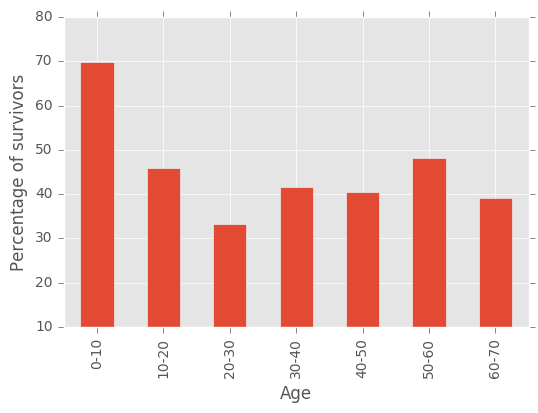

In [343]:
survived_by_age_decade = persons.dropna().groupby(persons['Age'] // 10 * 10).agg(['count', 'sum'])['Survived']
percent_survived_by_age_decade = survived_by_age_decade['sum'] / survived_by_age_decade['count'] * 100
bar_1 = percent_survived_by_age_decade.to_frame().plot.bar(legend=False)
bar_1.axis([-0.5, 6.5,10,80])
bar_1.set_xlabel('Age')
bar_1.set_ylabel('Percentage of survivors')

age_labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70']

bar_1.set_xticklabels(age_labels);

## Dependency between class and age of passengers

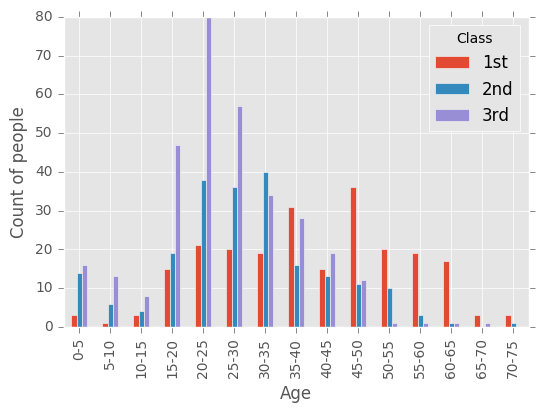

In [366]:
count_age_by_class = persons.groupby(['PClass',(persons['Age'] // 5 * 5)]).count()['Name'].to_frame().unstack('PClass').fillna(0)
bar_2 = count_age_by_class.plot(kind='bar')
legend = bar_2.legend(title='Class')

bar_2.set_ylabel('Count of people')

legend.get_texts()[0].set_text('1st')
legend.get_texts()[1].set_text('2nd')
legend.get_texts()[2].set_text('3rd')

age_labels = ['0-5', '5-10', '10-15', '15-20','20-25', '25-30',
              '30-35', '35-40', '40-45', '45-50', '50-55', '55-60',
              '60-65', '65-70','70-75']

bar_2.set_xticklabels(age_labels);

A lot of young people who were between 20-25 years old were in the third class ( because the students are poor basically :) ). Rich persons were traveled in first class and their age were between 35-40 and 45-50 years old.